In [1]:
import numpy as np
import pandas as pd
import os
import torch 
from torch import nn, optim 
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torch.utils.data
import matplotlib.pyplot as plt
import time
import itertools
import glob 
from PIL import Image
import csv 

In [26]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


bounding_box_dict = dict() #COntain cols 1, 2, 3, 4
{"*.jpeg": [[67, 47, 110, 117], [70, 30, 83, 34], [160, 46, 59, 63]], "*.jpeg"}
label_dict = dict() #COntains dummy variable of strawberry, blackspot
{"*.jpeg": [1, 1, 0, }
Update bouding box then update label in the for loop.
print(strawberry_csv["FreshStrawberries90.jpeg"])

In [3]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Baby Dataset Fruit Defects Dataset .zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# import transforms as T

# def get_transform(train):
#     transforms = []
#     transforms.append(T.ToTensor())
#     if train:
#         transforms.append(T.RandomHorizontalFlip(0.5))
#     return T.Compose(transforms)

In [ ]:
# def create_dataframe(image_file_paths):
    
#     classes = ["FreshApples", "FreshBananas", "FreshStrawberries", "RottenApples", "RottenBananas", "RottenStrawberries"]
#     dataframe = pd.DataFrame(image_file_paths, columns = ["image_path"])
#     dataframe["label"] = dataframe.apply(lambda row: classes.index(row["image_path"].rsplit('/', 3)[-3]), axis = 1)
    
#     return dataframe

# #Use glob glob to find pattern in file types to get list of all image paths
# # image_file_paths_train = glob.glob("/content/Fruit Defects Dataset /Train/*/*.jpeg")
# image_file_paths_extra = glob.glob("/content/Fruit Defects Dataset /Train/FreshStrawberries/Fresh StrawBerry Batch 3 Labeled/*.jpeg")
# # image_file_paths_test = glob.glob("/content/imagewoof2-160/val/*/*.JPEG")
# fruits_defects_train = create_dataframe(image_file_paths_extra)
# # image_woof_dataframe_test = create_dataframe(image_file_paths_test)
# print(np.unique(fruits_defects_train.label))
# # print(np.unique(image_woof_dataframe_test.label))

[2]


In [ ]:
#Read the Faster-R-CNN thing (https://debuggercafe.com/faster-rcnn-object-detection-with-pytorch/)
#Combine all the csv datasets that I have so far
#Get the big csv all in this for loop
#Label more data. 
#Update this data loading
#https://debuggercafe.com/faster-rcnn-object-detection-with-pytorch/


## To Do: 
make the class for loading in the data

* If statements  or (apply) to make file paths 
* Open Image
 * (transforms and augmentations) do research on this

* Labels - pass the torch tensor 

 * Copy and paste documentation excluding mask. 
 * Then change so it works for the code. 



return Image, Label

* Model: 
https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

In [4]:
#For one strawberry batch please drop watermark rows
strawberry_csv_batch_3 = pd.read_csv("/content/Fruit Defects Dataset /Train/FreshStrawberries/Fresh StrawBerry Batch 3 Labeled/FreshStrawberryBatch3Labels.csv", header = None)
strawberry_csv_batch_2 = pd.read_csv("/content/Fruit Defects Dataset /Train/FreshStrawberries/Fresh StrawBerry Batch 2 Labeled/FreshStrawberriesBatch2Labels.csv", header = None)
strawberry_csv_batch_1 = pd.read_csv("/content/Fruit Defects Dataset /Train/FreshStrawberries/Fresh StrawBerry Batch 1 Labeled/Strawberrybatch1.csv", header = None)
rottenApple_csv_batch_1 = pd.read_csv("/content/Fruit Defects Dataset /Train/RottenApples/RottenAppleBatch1Labeled/RottenAppleBatch1Labels.csv", header = None)
rottenApple_csv_batch_2 = pd.read_csv("/content/Fruit Defects Dataset /Train/RottenApples/RottenAppleBatch2Labeled/RottenApplesBatch2Labels.csv", header = None)
rottenApple_csv_batch_3 = pd.read_csv("/content/Fruit Defects Dataset /Train/RottenApples/RottenAppleBatch3Labaled/RottenApplesBatch3Labels.csv", header = None)



strawberry_csv_batch_3.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]
strawberry_csv_batch_2.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]
strawberry_csv_batch_1.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]
rottenApple_csv_batch_1.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]
rottenApple_csv_batch_2.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]
rottenApple_csv_batch_3.columns = ["Fruit", "Coord1", "Coord2", "Coord3", "Coord4", "Image_id", "OneSize", "TwoSize"]

#Drop some watermark data for Fresh StrawBerry Batch 1 Labeled images [59, 9, 93]

# strawberry_csv_batch_1 = strawberry_csv_batch_1[Image_id not in ["FreshStrawberries59.jpeg, FreshStrawberries9.jpeg, FreshStrawberries93.jpeg"]]
strawberry_csv_batch_1.drop(strawberry_csv_batch_1[strawberry_csv_batch_1["Image_id"] == "FreshStrawberries59.jpeg"].index, inplace = True)
strawberry_csv_batch_1.drop(strawberry_csv_batch_1[strawberry_csv_batch_1["Image_id"] == "FreshStrawberries9.jpeg"].index, inplace = True)
strawberry_csv_batch_1.drop(strawberry_csv_batch_1[strawberry_csv_batch_1["Image_id"] == "FreshStrawberries93.jpeg"].index, inplace = True)
strawberry_csv_batch_1 = strawberry_csv_batch_1.reset_index(drop=True)

#Stack all the csv files together. 
list_of_all_dataframes = [strawberry_csv_batch_1, strawberry_csv_batch_2, strawberry_csv_batch_3, rottenApple_csv_batch_1, rottenApple_csv_batch_2, rottenApple_csv_batch_3]
fruit_df = pd.concat(list_of_all_dataframes, ignore_index = True)

total_row_sum_check = 0 
for dataframe in list_of_all_dataframes:
  total_row_sum_check += dataframe.shape[0]
print("Checked total rows from all the dataframes combined: {}".format(total_row_sum_check))
assert total_row_sum_check == fruit_df.shape[0]
print("DataFrame shape: {}".format(fruit_df.shape))
print("Unique Fruit Labels {}".format(fruit_df["Fruit"].unique()))
print("Number of Unique Images {}".format(len(fruit_df["Image_id"].unique())))
  


Checked total rows from all the dataframes combined: 526
DataFrame shape: (526, 8)
Unique Fruit Labels ['Strawberry' 'Apples' 'Bad_Spots']
Number of Unique Images 159


In [5]:
bounding_box_dict = dict()
labels_dict = dict()
classes = ["Bad_Spots", "Strawberry", "Apples"]

for row_index in range(len(fruit_df)): 
  current_image_file = fruit_df.iloc[row_index]["Image_id"]
  if current_image_file not in bounding_box_dict:
    bounding_box_dict[current_image_file] = list()
    labels_dict[current_image_file] = list()
  bounding_box_dict[current_image_file].append(fruit_df.iloc[row_index, 1:5].to_list())
  labels_dict[current_image_file].append(classes.index(fruit_df.iloc[row_index, 0]))

print(len(bounding_box_dict))
print(len(labels_dict))

159
159


### Example Pseudo code for an image

For the image below we need 6 bounding boxes for example
Model forms 8. 

https://debuggercafe.com/faster-rcnn-object-detection-with-pytorch/

``` 
labels = ["Badspots", "Apples"]
labels (after processing) = [0, 1]

output = [{"boxes": [[], [], [], [], [], [], [], []],
          "labels": [0, 0, 0, 0, 1, 1, 0, 0, 0] #Predicted 6 bounding boxes and 2 apples. 
          "scores": [0.98, 0.95 ... 0.05 ] #Here we set a threshold so that bounding boxes with low confidence score are discarded.]            
```
The length of bouding box is determined by the batch size          

Then get the category names

```
class_names = ["Bad_Spots", "Apples", "Bananas", "Strawberry"]
```

Model pretrained load only for (Coco) * Important b/c we need to train on our datatset not on the Coco dataset
```
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, 
                                                    min_size=args['min_size'])
```


In [9]:
bounding_box_dict

{'FreshStrawberries0.jpeg': [[201, 52, 63, 45]],
 'FreshStrawberries1.jpeg': [[45, 15, 194, 164]],
 'FreshStrawberries10.jpeg': [[42, 42, 88, 109]],
 'FreshStrawberries12.jpeg': [[66, 122, 54, 68]],
 'FreshStrawberries13.jpeg': [[20, 26, 55, 60]],
 'FreshStrawberries14.jpeg': [[41, 36, 105, 131]],
 'FreshStrawberries15.jpeg': [[25, 28, 73, 120], [87, 51, 141, 138]],
 'FreshStrawberries16.jpeg': [[129, 20, 82, 92]],
 'FreshStrawberries17.jpeg': [[85, 14, 127, 117]],
 'FreshStrawberries18.jpeg': [[53, 69, 159, 98]],
 'FreshStrawberries19.jpeg': [[23, 9, 184, 199], [10, 166, 98, 58]],
 'FreshStrawberries21.jpeg': [[58, 74, 63, 57],
  [125, 66, 69, 85],
  [99, 29, 36, 44]],
 'FreshStrawberries24.jpeg': [[47, 54, 109, 130]],
 'FreshStrawberries26.jpeg': [[49, 19, 170, 186]],
 'FreshStrawberries27.jpeg': [[13, 36, 167, 212]],
 'FreshStrawberries29.jpeg': [[81, 5, 150, 144]],
 'FreshStrawberries33.jpeg': [[21, 19, 51, 54]],
 'FreshStrawberries34.jpeg': [[1, 42, 70, 58]],
 'FreshStrawberries35

In [20]:
sorted(labels_dict.keys())[20]

'FreshStrawberries37.jpeg'

get a for loop and loop throufh each image key create a new word 
so like 
a then ap then app then appl then apple and check if each word is in the folder name. 

* get the keys of the dictionary and then put in into self.imgs list. 
Now I can use if statements to build the root. 

Now i have a list of keys
So I can access the bouding boxes and the label list using that key

Create a dataframe with image_keys and roots.

## Class function

In [ ]:
def determine_root(image_id):

  if "FreshStrawberries" in image_id: 
    return ""


In [ ]:
class FruitDetectDataset(object):
  def __init__(self, id_labels, id_bounding_boxes, transforms):

    assert len(id_labels) == len(id_bounding_boxes)
    assert sorted(id_labels.keys()) == sorted(id_bounding_boxes.keys())
    self.imgs_key = sorted(id_labels.keys())
    self.id_labels = id_labels
    self.id_bounding_boxes = id_bounding_boxes

    self.transforms = transforms

  def __getitem__(self, idx):

    root_image 






        # load images ad masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
class FruitDefectsDataset():
    def __init__(self, df, transform, extra_transforms = False):
        
        self.transform = transform
        self.df = df
        self.extra_transforms = extra_transforms
        
        
    def __getitem__(self, index):
        
        image_path = self.df["image_path"].iloc[index]
        image = Image.open(image_path).convert("RGB")
        label = self.df["label"].iloc[index]
        
        if self.transform != None:
            image = self.transform(image)
            
        return (image, label)
    
    
    def __len__(self):
        
        return len(self.df)

In [ ]:
data_dir = "/content/Fruit Defects Dataset "
batch_size = 21
#Set random seed
np.random.seed(42)
torch.manual_seed(42)

train_transform = transforms.Compose([
                                      transforms.Resize(140),
                                      transforms.CenterCrop(128),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# test_transform = transforms.Compose([
#                                      transforms.Resize(140),
#                                      transforms.CenterCrop(128),
#                                      transforms.ToTensor(),
#                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


# train_data = datasets.ImageFolder(os.path.join(data_dir, "Train"), transform = train_transform)
# test_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform = test_transform)
train_dataset = FruitDefectsDataset(fruits_defects_train, train_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

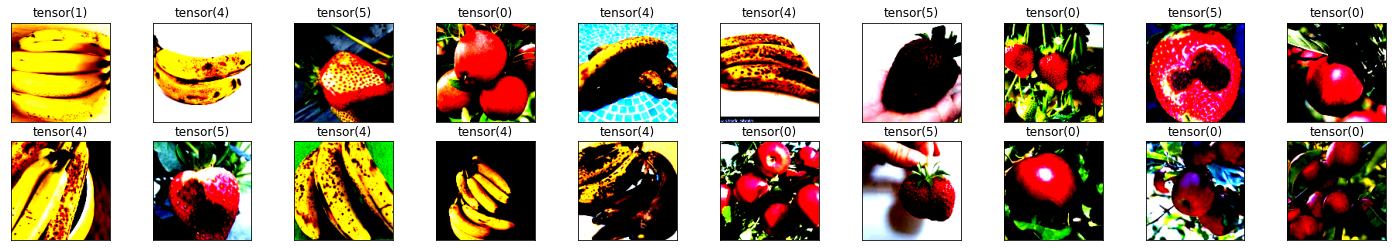

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(labels[idx])

In [ ]:

# bounding_box_dict = dict()
# labels_dict = dict()
# classes = ["Black_Spots", "Strawberry"]

# for row_index in range(len(strawberry_csv)): 
#   current_image_file = strawberry_csv.iloc[row_index]["Image_id"]
#   if current_image_file not in bounding_box_dict:
#     bounding_box_dict[current_image_file] = list()
#     labels_dict[current_image_file] = list()
#   bounding_box_dict[current_image_file].append(strawberry_csv.iloc[row_index, 1:5].to_list())
#   labels_dict[current_image_file].append(classes.index(strawberry_csv.iloc[row_index, 0]))

